In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from prophet import Prophet
from pmdarima import auto_arima
import warnings

In [37]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [39]:
! pip install yfinance

In [40]:
import statsmodels

In [41]:
ticker = yf.Ticker("HPE.NS")

In [49]:
import yfinance as yf
import time
import warnings

warnings.filterwarnings("ignore")

def get_info_with_retry(ticker_symbol, max_retries=5, wait_seconds=10):
    for attempt in range(max_retries):
        try:
            ticker = yf.Ticker(ticker_symbol)
            info = ticker.info
            return info
        except Exception as e:
            if 'Rate limited' in str(e):
                print(f"⏳ Rate limited. Waiting {wait_seconds} seconds before retrying... (Attempt {attempt+1})")
                time.sleep(wait_seconds)
                wait_seconds *= 2  # Exponential backoff
            else:
                print("❌ Other error:", e)
                break
    print("❌ Failed to fetch data after retries.")
    return {}

# Example usage
info = get_info_with_retry("HPE")
if info:
    print("Company Sector:", info.get('sector', 'N/A'))
    print("Price Earnings Ratio:", info.get('trailingPE', 'N/A'))

⏳ Rate limited. Waiting 10 seconds before retrying... (Attempt 1)
⏳ Rate limited. Waiting 20 seconds before retrying... (Attempt 2)
⏳ Rate limited. Waiting 40 seconds before retrying... (Attempt 3)
⏳ Rate limited. Waiting 80 seconds before retrying... (Attempt 4)
⏳ Rate limited. Waiting 160 seconds before retrying... (Attempt 5)
❌ Failed to fetch data after retries.


In [51]:
pip install eodhd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.1/173.1 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: rich
    Found existing installation: rich 13.3.5
    Uninstalling rich-13.3.5:
      Successfully uninstalled rich-13.3.5
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


 Fetched data for HPE
 Fetched data for HPQ


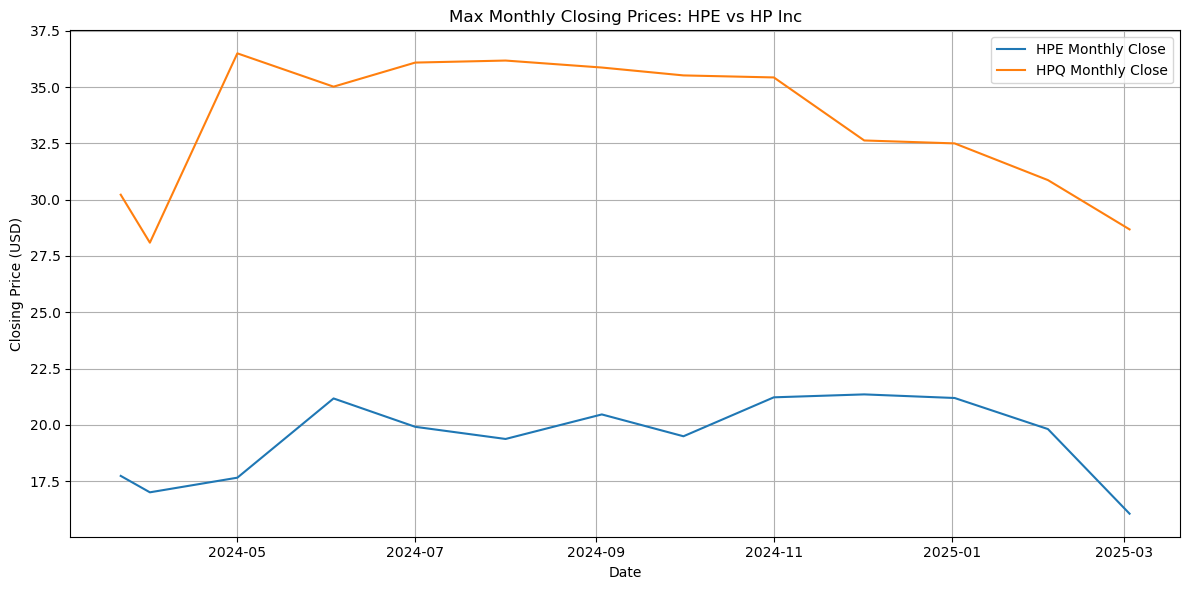

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set your EODHD API key here
api_token = " 67dee74df227a6.28340125"

# Tickers and exchange
tickers = ['HPE', 'HPQ']
exchange = 'US'

# Dictionary to hold dataframes
data_dict = {}

# Loop through each ticker to get max available monthly data
for ticker in tickers:
    url = f"https://eodhistoricaldata.com/api/eod/{ticker}.{exchange}"
    params = {
        'api_token': api_token,
        'period': 'm',       # Monthly frequency
        'fmt': 'json',       # JSON format
        'order': 'a'         # Ascending date order
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        data_dict[ticker] = df
        print(f" Fetched data for {ticker}")
    else:
        print(f"Error fetching data for {ticker}: Status Code {response.status_code}")

#  Plotting
plt.figure(figsize=(12, 6))
for ticker in data_dict:
    plt.plot(data_dict[ticker]['close'], label=f"{ticker} Monthly Close")

plt.title("Max Monthly Closing Prices: HPE vs HP Inc")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
! pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 749.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 9.5 MB/s eta 0:00:00:00:0100:01


In [23]:
# Prepare HPE data for Prophet
hpe_df = data_dict['HPE'][['close']].reset_index()
hpe_df.columns = ['ds', 'y']  # Prophet requires columns: ds (date), y (value)

# Prepare HPQ data for Prophet
hpq_df = data_dict['HPQ'][['close']].reset_index()
hpq_df.columns = ['ds', 'y']

22:17:54 - cmdstanpy - INFO - Chain [1] start processing
22:17:57 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
22:17:57 - cmdstanpy - INFO - Chain [1] start processing
22:17:57 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


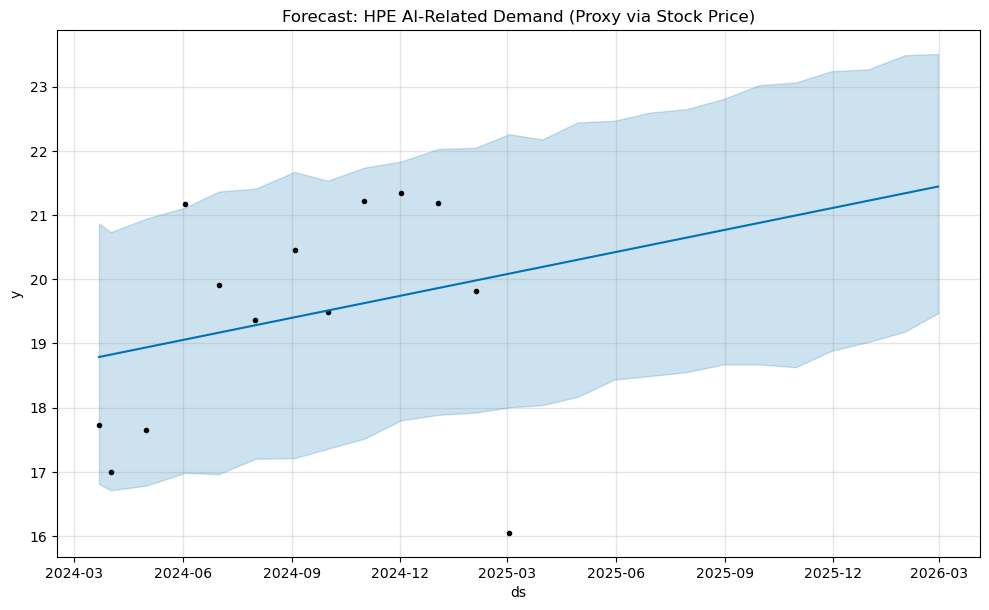

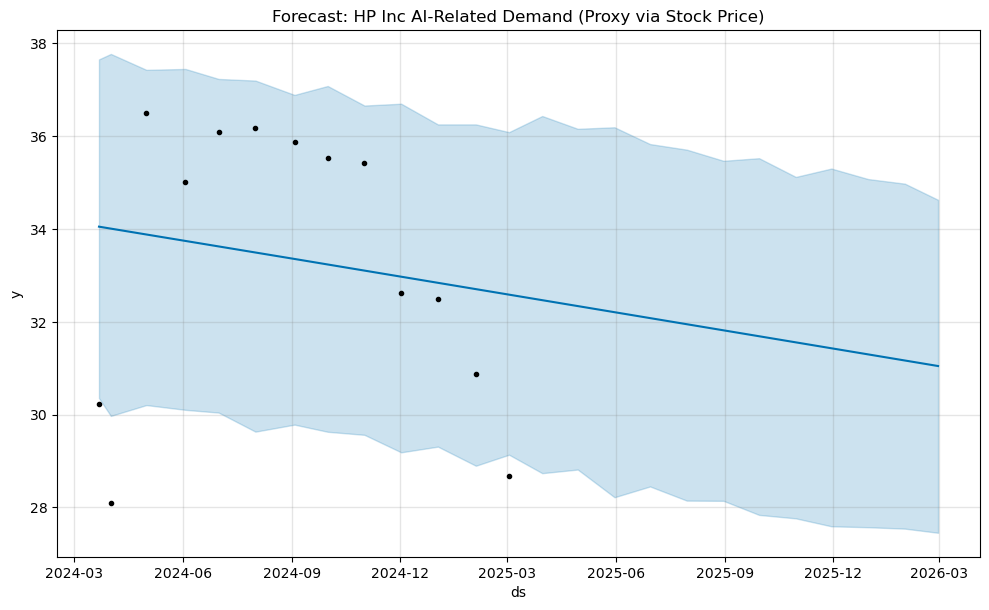

In [25]:
# Forecasting with Prophet for HPE
hpe_model = Prophet()
hpe_model.fit(hpe_df)

future_hpe = hpe_model.make_future_dataframe(periods=12, freq='M')
forecast_hpe = hpe_model.predict(future_hpe)

# Forecasting with Prophet for HP Inc
hpq_model = Prophet()
hpq_model.fit(hpq_df)

future_hpq = hpq_model.make_future_dataframe(periods=12, freq='M')
forecast_hpq = hpq_model.predict(future_hpq)

# Plot results
hpe_model.plot(forecast_hpe)
plt.title("Forecast: HPE AI-Related Demand (Proxy via Stock Price)")
plt.show()

hpq_model.plot(forecast_hpq)
plt.title("Forecast: HP Inc AI-Related Demand (Proxy via Stock Price)")
plt.show()


In [31]:
print("HPE rows:", len(hpe_df))
print("HPQ rows:", len(hpq_df))

print("HPE nulls:\n", hpe_df.isnull().sum())
print("HPQ nulls:\n", hpq_df.isnull().sum())


HPE rows: 13
HPQ rows: 13
HPE nulls:
 ds    0
y     0
dtype: int64
HPQ nulls:
 ds    0
y     0
dtype: int64


In [35]:
# Drop NaNs if any
hpe_df = hpe_df.dropna(subset=['y'])
hpq_df = hpq_df.dropna(subset=['y'])

# Recreate time series with datetime index
hpe_arima_df = hpe_df.set_index('ds')
hpq_arima_df = hpq_df.set_index('ds')

In [39]:
from pmdarima import auto_arima

# Fit ARIMA for HPE without seasonality
hpe_arima_model = auto_arima(hpe_arima_df['y'], seasonal=False, trace=True, suppress_warnings=True)
hpe_arima_forecast = hpe_arima_model.predict(n_periods=12)

# Fit ARIMA for HPQ without seasonality
hpq_arima_model = auto_arima(hpq_arima_df['y'], seasonal=False, trace=True, suppress_warnings=True)
hpq_arima_forecast = hpq_arima_model.predict(n_periods=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.110, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61.845, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.390 seconds
Performing stepwise search to minimize aic


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.178, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=73.601, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=75.035, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=73.507, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=75.469, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=77.533, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.470 seconds


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [47]:
# Create future dates for HPQ forecast
future_dates = pd.date_range(
    start=hpq_arima_df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='ME'
)


/var/folders/gq/sxzjvrb13q1976s9q3n73b9m0000gn/T/ipykernel_41802/1925010342.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


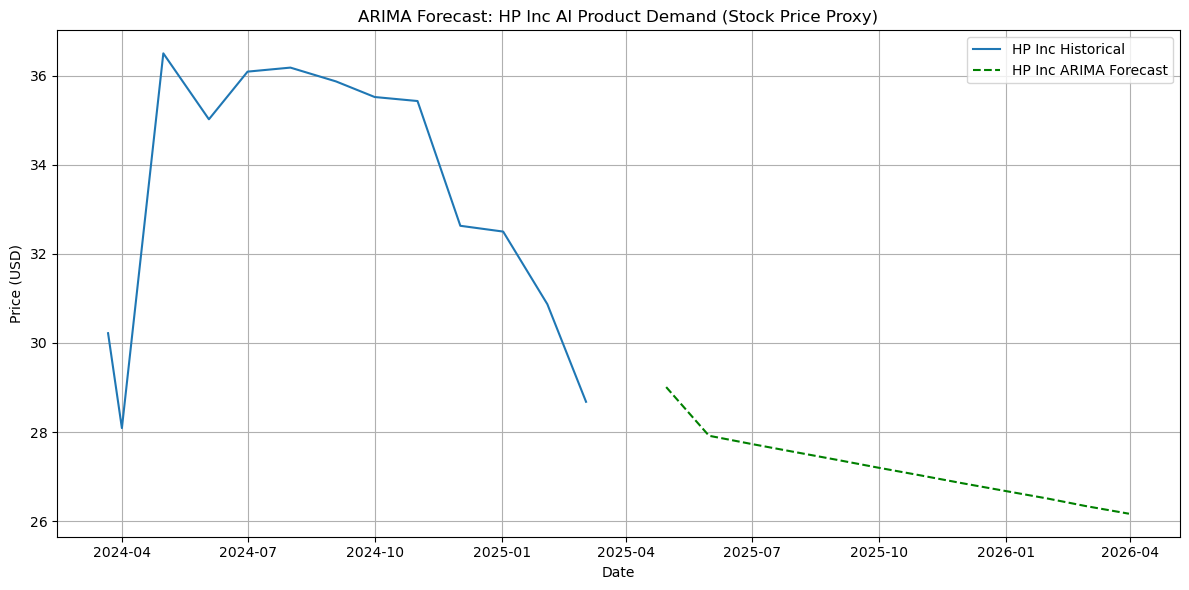

In [49]:
# Create future dates for HPQ forecast
future_dates = pd.date_range(
    start=hpq_arima_df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='M'
)

# Plot HPQ Forecast
plt.figure(figsize=(12, 6))
plt.plot(hpq_arima_df.index, hpq_arima_df['y'], label='HP Inc Historical')
plt.plot(future_dates, hpq_arima_forecast, label='HP Inc ARIMA Forecast', linestyle='--', color='green')
plt.title("ARIMA Forecast: HP Inc AI Product Demand (Stock Price Proxy)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


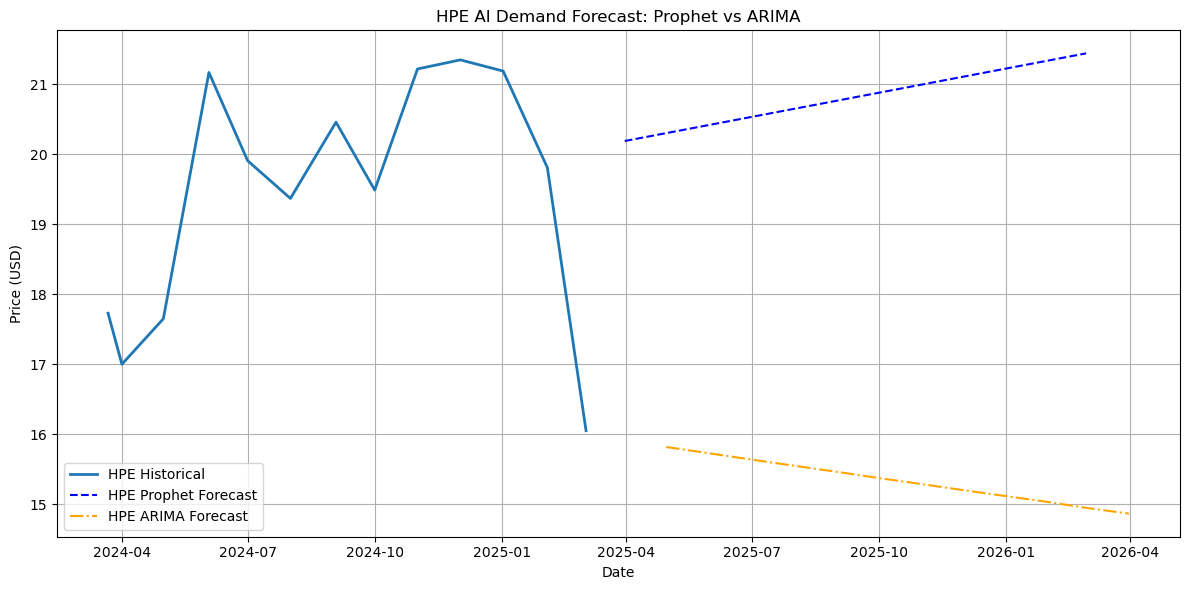

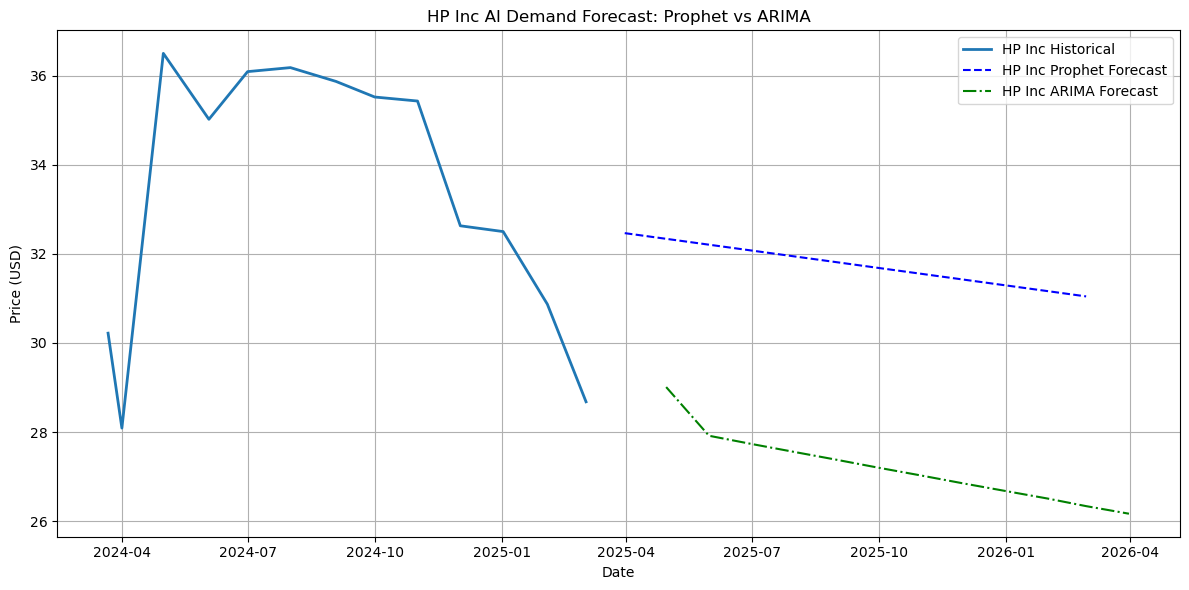

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Get Prophet forecasted values
prophet_hpe = forecast_hpe[['ds', 'yhat']].tail(12)
prophet_hpq = forecast_hpq[['ds', 'yhat']].tail(12)

# Forecast dates for ARIMA
future_dates_hpe = pd.date_range(start=hpe_arima_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
future_dates_hpq = pd.date_range(start=hpq_arima_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')

# ----- Plot for HPE -----
plt.figure(figsize=(12, 6))
plt.plot(hpe_df['ds'], hpe_df['y'], label='HPE Historical', linewidth=2)
plt.plot(prophet_hpe['ds'], prophet_hpe['yhat'], label='HPE Prophet Forecast', linestyle='--', color='blue')
plt.plot(future_dates_hpe, hpe_arima_forecast, label='HPE ARIMA Forecast', linestyle='-.', color='orange')
plt.title("HPE AI Demand Forecast: Prophet vs ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot for HP Inc (HPQ) -----
plt.figure(figsize=(12, 6))
plt.plot(hpq_df['ds'], hpq_df['y'], label='HP Inc Historical', linewidth=2)
plt.plot(prophet_hpq['ds'], prophet_hpq['yhat'], label='HP Inc Prophet Forecast', linestyle='--', color='blue')
plt.plot(future_dates_hpq, hpq_arima_forecast, label='HP Inc ARIMA Forecast', linestyle='-.', color='green')
plt.title("HP Inc AI Demand Forecast: Prophet vs ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


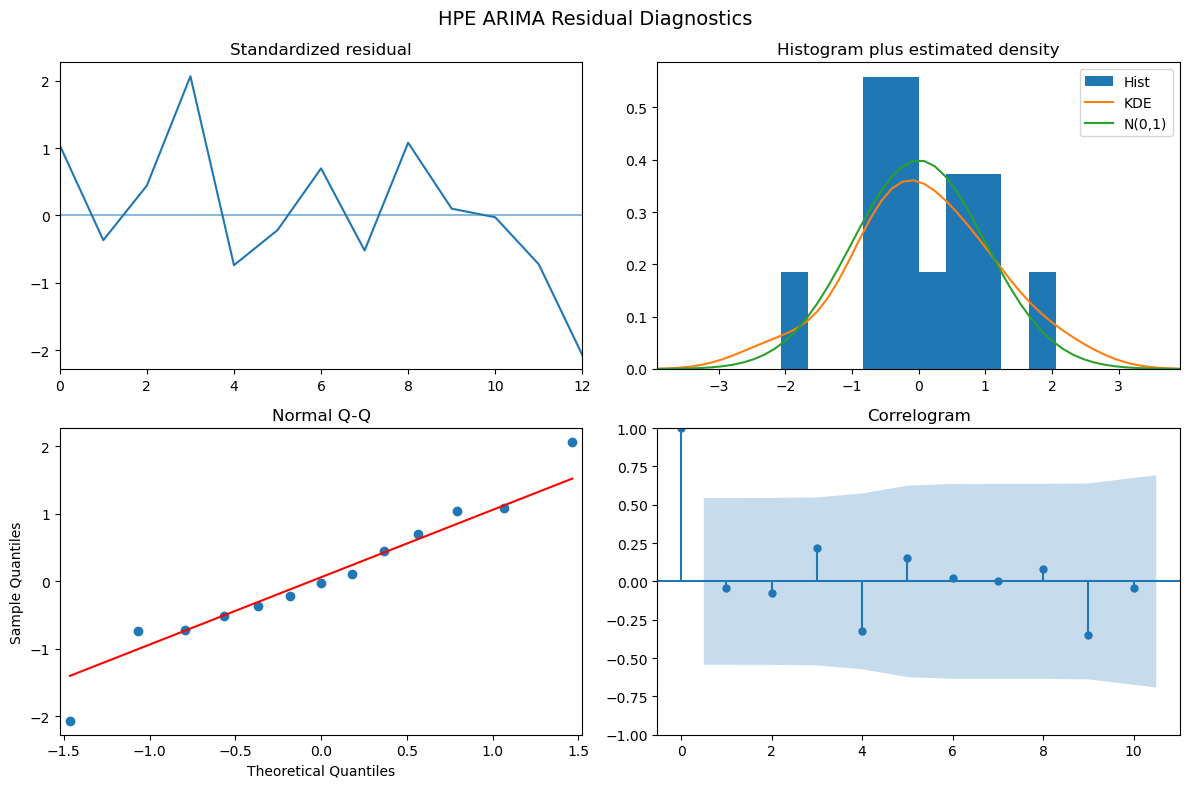

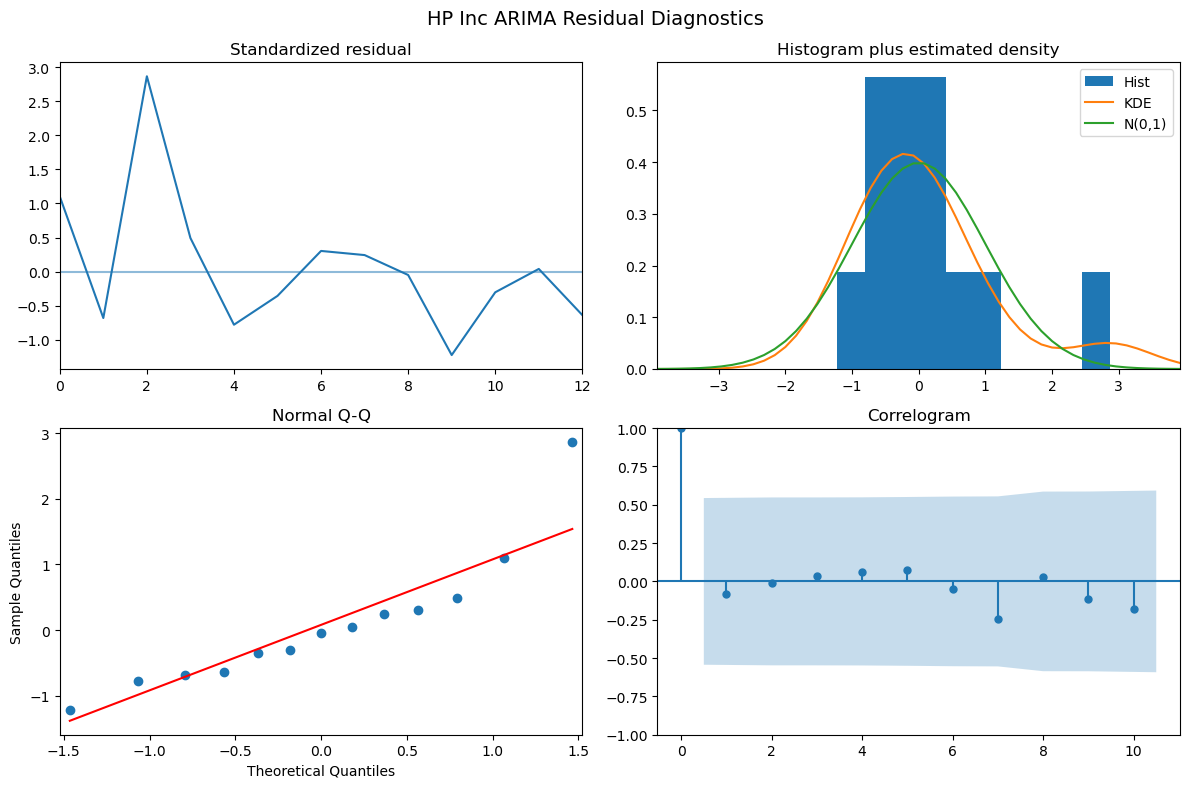

In [53]:
# Plot diagnostics for HPE ARIMA model
hpe_arima_model.plot_diagnostics(figsize=(12, 8))
plt.suptitle("HPE ARIMA Residual Diagnostics", fontsize=14)
plt.tight_layout()
plt.show()

# Plot diagnostics for HPQ ARIMA model
hpq_arima_model.plot_diagnostics(figsize=(12, 8))
plt.suptitle("HP Inc ARIMA Residual Diagnostics", fontsize=14)
plt.tight_layout()
plt.show()


#### using the ARIMA model + extracted stock price data to run a Monte Carlo simulation for advanced scenario forecasting.



#### Step 1: Calculate Daily Returns & Volatility

In [61]:
import numpy as np

# Use historical prices
hpe_prices = hpe_arima_df['y']
hpq_prices = hpq_arima_df['y']

# Calculate log returns
hpe_returns = np.log(hpe_prices / hpe_prices.shift(1)).dropna()
hpq_returns = np.log(hpq_prices / hpq_prices.shift(1)).dropna()

# Drift and volatility
hpe_mu = hpe_returns.mean()
hpe_sigma = hpe_returns.std()

hpq_mu = hpq_returns.mean()
hpq_sigma = hpq_returns.std()


#### Step 2: Run Monte Carlo Simulation

In [64]:
# Parameters
simulations = 1000
days = 12  # months (change to 252 for daily if using daily data)
hpe_last_price = hpe_prices.iloc[-1]
hpq_last_price = hpq_prices.iloc[-1]

# Empty arrays
hpe_simulations = np.zeros((days, simulations))
hpq_simulations = np.zeros((days, simulations))

# Simulate HPE and HPQ paths
for sim in range(simulations):
    hpe_price_path = [hpe_last_price]
    hpq_price_path = [hpq_last_price]
    for t in range(1, days):
        hpe_price = hpe_price_path[-1] * np.exp(hpe_mu + hpe_sigma * np.random.normal())
        hpq_price = hpq_price_path[-1] * np.exp(hpq_mu + hpq_sigma * np.random.normal())
        hpe_price_path.append(hpe_price)
        hpq_price_path.append(hpq_price)
    
    hpe_simulations[:, sim] = hpe_price_path
    hpq_simulations[:, sim] = hpq_price_path


#### Step 3: Plot Monte Carlo Simulation Results

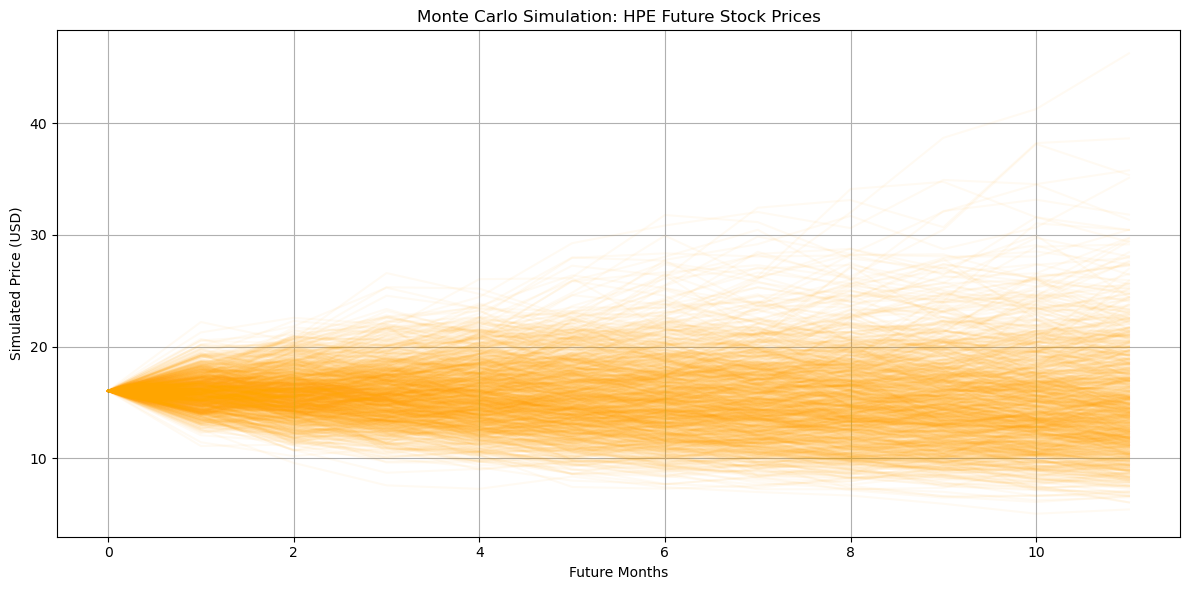

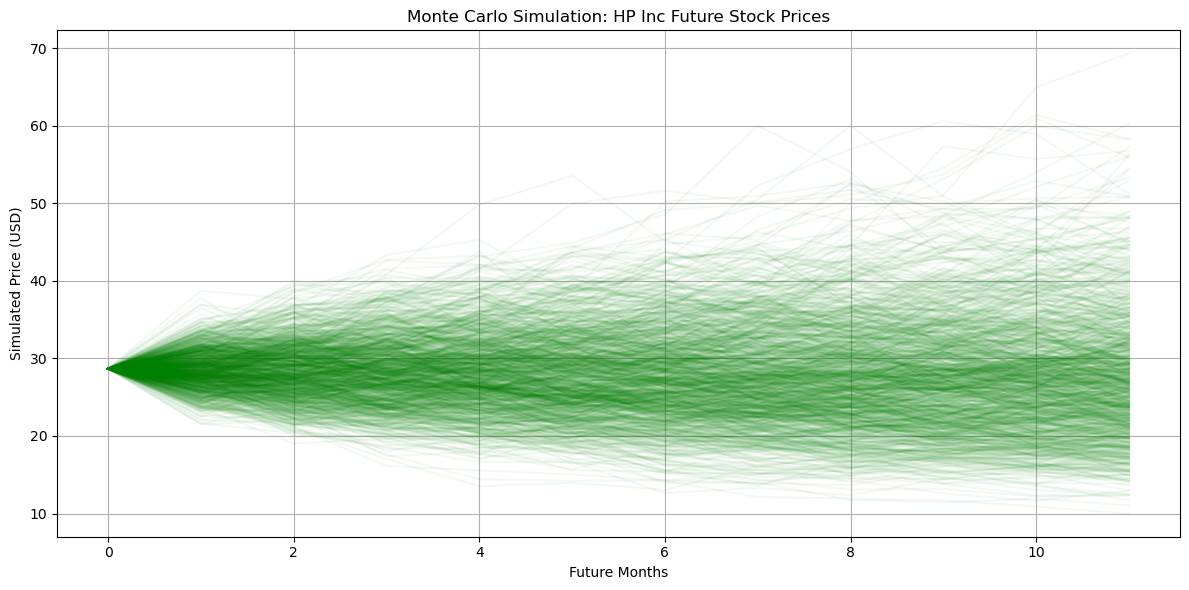

In [67]:
import matplotlib.pyplot as plt

# Dates
future_dates = pd.date_range(start=hpe_arima_df.index[-1] + pd.DateOffset(months=1), periods=days, freq='ME')

# HPE Plot
plt.figure(figsize=(12, 6))
plt.plot(hpe_simulations, color='orange', alpha=0.05)
plt.title("Monte Carlo Simulation: HPE Future Stock Prices")
plt.xlabel("Future Months")
plt.ylabel("Simulated Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# HPQ Plot
plt.figure(figsize=(12, 6))
plt.plot(hpq_simulations, color='green', alpha=0.05)
plt.title("Monte Carlo Simulation: HP Inc Future Stock Prices")
plt.xlabel("Future Months")
plt.ylabel("Simulated Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
